In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import galsim
import numpy as np
import matplotlib.pylab as plt
import time
import fpfs

import batsim.pltutil as batplot
from batsim.stamp import Stamp
from batsim.transforms import IaTransform 

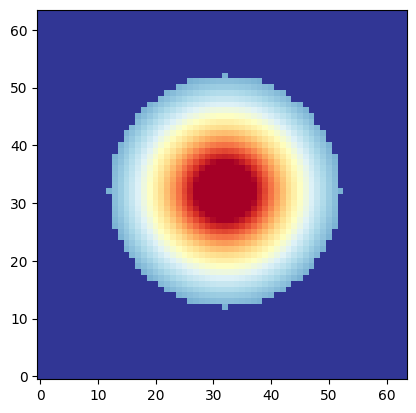

In [21]:
flux = 40
scale = 0.2
nn = 64
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=1.5, flux=flux, trunc=4)
stamp = Stamp(nn=nn, scale=scale)
gal_array = stamp.sample_galaxy(sersic_gal)
plt.close()
batplot.make_plot_image(gal_array)

0.035069942474365234


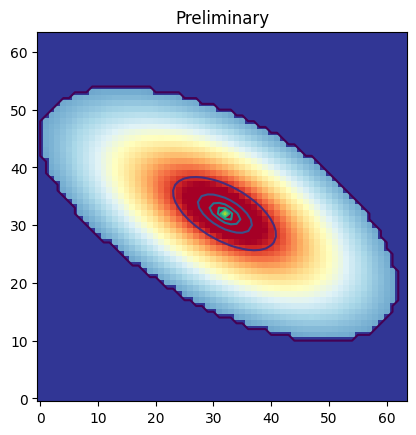

In [27]:
start = time.time()
kappa = 0.0
rwf = np.linspace(1,5,100)
gamma1 = 0.03
gamma2 = -0.05
lens = IaTransform(g1=gamma1, g2=gamma2, 
                     center=(33,33), scale=scale, hlr=1.5)

stamp = Stamp(nn=nn, scale=scale)
stamp.transform_grids(lens)
gal_array2 = stamp.sample_galaxy(sersic_gal)
plt.close()
batplot.make_plot_image(gal_array2)
plt.contour(gal_array2)
plt.title('Preliminary')

end = time.time()

print(end-start)

In [29]:
kappa = 0.0
gamma1 = 0.02
gamma2 = 0.0
lens = LensTransform1(gamma1=gamma1, gamma2=gamma2, kappa=kappa)
stamp = fpfs.simutil.Stamp(nn=64, scale=scale)
stamp.transform_grids(lens)
gal_array3 = stamp.sample_galaxy(sersic_gal)
psf_array = np.zeros(stamp.shape)
psf_array[nn // 2, nn // 2] = 1

coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.52)
mms =  fpTask.measure(gal_array3, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=20)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("input shear: %.5f" % gamma1)
print("measured shear: %.5f" % shear)

2023/10/16 16:57:51 ---  Order of the shear estimator: nnord=4
2023/10/16 16:57:51 ---  Shapelet kernel in configuration space: sigma= 0.5200 arcsec
2023/10/16 16:57:51 ---  Detection kernel in configuration space: sigma= 0.5200 arcsec


input shear: 0.02000
measured shear: 0.02003
